## Proyecto 2

### Análisis de beta en el mercado

#### Andrea Flores Fernández, Yara Zepeda Zambrano, Tania Bell Nicholls

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import pandas_datareader.data as web 
import statistics as stats
import random

In [49]:
def closes(names,start_date,end_date):
    return web.DataReader(names,'yahoo',start_date,end_date)['Adj Close']

In [50]:
names=['^GSPC','TSLA','WEN']
data=closes(names,'2019-01-01','2019-12-31')
data

Symbols,^GSPC,TSLA,WEN
Date,,,
2019-01-02,2510.030029,310.119995,15.219536
2019-01-03,2447.889893,300.359985,15.141687
2019-01-04,2531.939941,317.690002,15.482278
2019-01-07,2549.689941,334.959991,15.725558
2019-01-08,2574.409912,335.350006,15.871524
...,...,...,...
2019-12-24,3223.379883,425.250000,22.037510
2019-12-26,3239.909912,430.940002,22.007689
2019-12-27,3240.020020,430.380005,22.027571


In [51]:
data1=((data.shift()/data)-1).dropna()
data1

Symbols,^GSPC,TSLA,WEN
Date,,,
2019-01-03,0.025385,0.032494,0.005141
2019-01-04,-0.033196,-0.054550,-0.021999
2019-01-07,-0.006962,-0.051558,-0.015470
2019-01-08,-0.009602,-0.001163,-0.009197
2019-01-09,-0.004081,-0.009394,-0.004881
...,...,...,...
2019-12-24,0.000195,-0.014180,-0.006766
2019-12-26,-0.005102,-0.013204,0.001355
2019-12-27,-0.000034,0.001301,-0.000903


#### Diferencias S&P

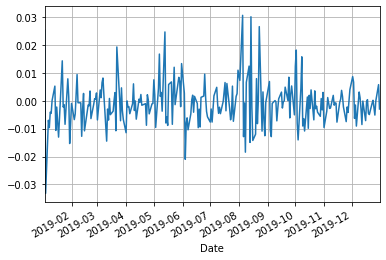

In [52]:
data1['^GSPC'].plot(grid=True)

#### Diferencias TESLA

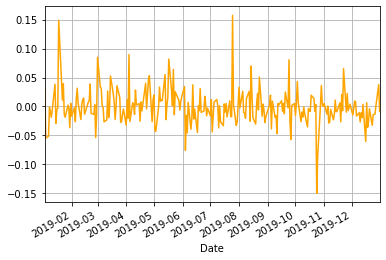

In [53]:
data1['TSLA'].plot(grid=True,c='orange')

#### Diferencias WENDYS

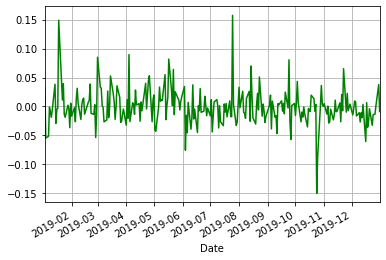

In [54]:
data1['TSLA'].plot(grid=True,c='g')

#### Gráfica de contraste de diferencias diarias 2019

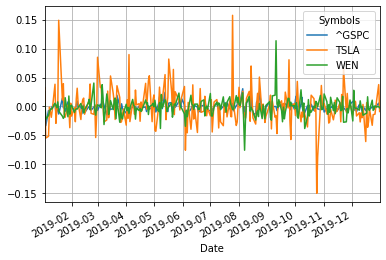

In [55]:
data1.plot(grid=True)

In [57]:
def covar(mercado,accion):
    covarianza=np.cov(data1[mercado],data1[accion],bias=True)[0][1]
    return covarianza

In [58]:
def var(mercado):
    varianza=stats.pvariance(data1[mercado])
    return varianza

In [59]:
def beta(mercado,accion):
    beta=covar(mercado,accion)/var(mercado)
    return beta

In [60]:
resultados=pd.DataFrame(columns=['ANALISIS','TSLA','WEN'])
resultados['ANALISIS']=['COVARIANZA','BETA']
resultados['TSLA']=[covar('^GSPC','TSLA'),beta('^GSPC','TSLA')]
resultados['WEN']=[covar('^GSPC','WEN'),beta('^GSPC','WEN')]

resultados

,ANALISIS,TSLA,WEN
0,COVARIANZA,0.000081,0.000030
1,BETA,1.309583,0.478763


#### Predicción

En base al promedio de las variaciones del 2019 de cada acción, generamos una caminata aleatoria para predecir el movimiento de cada acción para el 2020. Usamos el promedio como valor mínimo y máximo que pudiera llegar a subir o bajar la acción cada día. Lo simulamos 10 veces para ver varias posibilidades.

In [61]:
variaciones=(data-data.shift()).dropna()
variaciones

Symbols,^GSPC,TSLA,WEN
Date,,,
2019-01-03,-62.140137,-9.760010,-0.077848
2019-01-04,84.050049,17.330017,0.340590
2019-01-07,17.750000,17.269989,0.243280
2019-01-08,24.719971,0.390015,0.145966
2019-01-09,10.550049,3.179993,0.077850
...,...,...,...
2019-12-24,-0.630127,6.029999,0.149103
2019-12-26,16.530029,5.690002,-0.029821
2019-12-27,0.110107,-0.559998,0.019882


In [62]:
def sim(accion,N):
    simulacion=[data[accion][-1]]
    for i in range(N):
        simulacion.append(simulacion[i]+random.uniform(-np.mean(variaciones[accion]),np.mean(variaciones[accion])))
    return simulacion

#### Predicción de TESLA

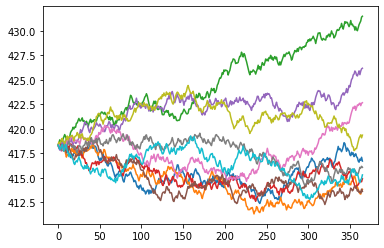

In [63]:
for i in range(10):
    plt.plot(sim('TSLA',365))

#### Predicción de WENDYS

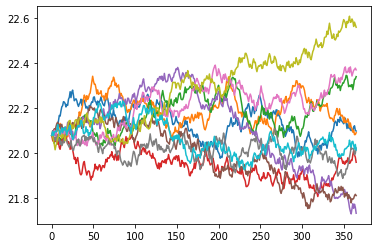

In [64]:
for i in range(10):
    plt.plot(sim('WEN',365))


#### Probabilidad Precio Umbral TESLA

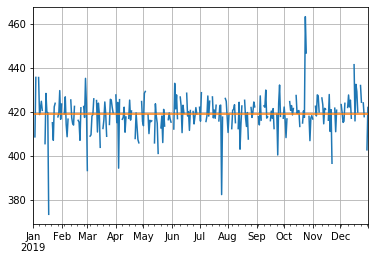

In [87]:
Umbral_T=data['TSLA'].iloc[-1]+np.mean(variaciones['TSLA'])
# Fechas
start_date='2019-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
# DataFrame de Umbrales
DF_Umbral_T=pd.DataFrame(index=dates,data=np.ones(365)*Umbral_T)
#DF_Umbral
# Concatenar y graficar
simCloses_TSLA_U=pd.concat([variaciones['TSLA']+data['TSLA'].iloc[-1],DF_Umbral_T],axis=1)
simCloses_TSLA_U.plot(grid=True,legend=False)

In [88]:
N=11
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
tablaSim_T=pd.DataFrame(index=dates,columns=list(range(N)))
for i in range(N):
    tablaSim_T[i]=sim('TSLA',364)
tablaSim_T

,0,1,2,3,4,5,6,7,8,9,10
2020-01-01,418.329987,418.329987,418.329987,418.329987,418.329987,418.329987,418.329987,418.329987,418.329987,418.329987,418.329987
2020-01-02,418.126045,418.559398,418.036139,418.477710,418.630217,418.711124,418.528601,418.356207,418.630177,418.152648,418.365917
2020-01-03,417.730668,418.914025,417.961140,418.127791,418.259682,419.086105,418.685405,418.449947,418.480401,418.162403,418.727499
2020-01-04,417.428345,418.919046,418.109614,418.122442,418.683418,418.970753,418.931472,418.688574,418.524300,418.039658,418.826611
2020-01-05,417.331977,419.083364,418.453330,418.421297,418.556144,419.071827,418.574554,418.654139,418.316778,417.743625,418.924095
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,419.035606,416.329111,414.805224,421.777860,416.781515,412.667972,422.811942,416.461502,415.634055,412.009352,413.352775
2020-12-27,418.967491,416.058943,414.873432,422.019242,416.463361,412.339368,422.839498,416.180978,415.585969,411.792137,413.407913
2020-12-28,418.874938,416.464690,414.799533,422.357636,416.187525,412.259823,423.094728,416.189279,415.513591,411.952507,413.131804
2020-12-29,418.585983,416.552099,415.035174,422.454163,415.916682,412.261292,423.175560,415.871929,415.626403,411.593433,413.157403


In [90]:
tablaComparativa_T=tablaSim_T>Umbral_T
tablaComparativa_T

,0,1,2,3,4,5,6,7,8,9,10
2020-01-01,False,False,False,False,False,False,False,False,False,False,False
2020-01-02,False,False,False,False,False,False,False,False,False,False,False
2020-01-03,False,True,False,False,False,True,False,False,False,False,False
2020-01-04,False,True,False,False,False,True,True,False,False,False,True
2020-01-05,False,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,True,False,False,True,False,False,True,False,False,False,False
2020-12-27,True,False,False,True,False,False,True,False,False,False,False
2020-12-28,True,False,False,True,False,False,True,False,False,False,False
2020-12-29,False,False,False,True,False,False,True,False,False,False,False


In [114]:
suma_T=np.count_nonzero(tablaComparativa_T)
suma_T

1514

In [115]:
probabilidad_T=suma_T/3650
probabilidad_T*100

41.47945205479452

#### Probabilidad Precio Umbral WENDYS

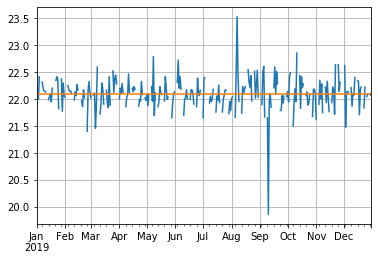

In [95]:
Umbral_W=data['WEN'].iloc[-1]+np.mean(variaciones['WEN'])
start_date='2019-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
DF_Umbral_W=pd.DataFrame(index=dates,data=np.ones(365)*Umbral_W)
simCloses_WEN_U=pd.concat([variaciones['WEN']+data['WEN'].iloc[-1],DF_Umbral_W],axis=1)
simCloses_WEN_U.plot(grid=True,legend=False)

In [96]:
N=11
start_date='2020-01-01'
dates=pd.date_range(start_date,periods=365,freq='D')
tablaSim_W=pd.DataFrame(index=dates,columns=list(range(N)))
for i in range(N):
    tablaSim_W[i]=sim('WEN',364)
tablaSim_W

,0,1,2,3,4,5,6,7,8,9,10
2020-01-01,22.077271,22.077271,22.077271,22.077271,22.077271,22.077271,22.077271,22.077271,22.077271,22.077271,22.077271
2020-01-02,22.064488,22.055013,22.083345,22.073227,22.091589,22.058435,22.072966,22.088238,22.100425,22.064929,22.062415
2020-01-03,22.053907,22.067599,22.103375,22.051291,22.076522,22.064228,22.056431,22.110980,22.112300,22.069885,22.063459
2020-01-04,22.036444,22.063518,22.094076,22.026602,22.081889,22.090726,22.036216,22.089451,22.122768,22.058480,22.073299
2020-01-05,22.011349,22.044206,22.092371,22.018104,22.089054,22.072185,22.061750,22.081217,22.123022,22.079802,22.081196
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,22.022103,22.263609,21.878758,21.958599,21.780569,21.543062,22.576836,21.855780,22.408643,21.060735,21.882842
2020-12-27,22.012566,22.270066,21.902555,21.938002,21.776067,21.569091,22.589326,21.848526,22.417295,21.070404,21.892569
2020-12-28,22.014512,22.276322,21.877154,21.953136,21.781210,21.583619,22.566438,21.839031,22.430291,21.090667,21.889166
2020-12-29,22.025513,22.283718,21.887210,21.928276,21.796846,21.580174,22.583639,21.824980,22.423962,21.077461,21.906844


In [97]:
tablaComparativa_W=tablaSim_W>Umbral_W
tablaComparativa_W

,0,1,2,3,4,5,6,7,8,9,10
2020-01-01,False,False,False,False,False,False,False,False,False,False,False
2020-01-02,False,False,False,False,False,False,False,False,False,False,False
2020-01-03,False,False,False,False,False,False,False,True,True,False,False
2020-01-04,False,False,False,False,False,False,False,False,True,False,False
2020-01-05,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,False,True,False,False,False,False,True,False,True,False,False
2020-12-27,False,True,False,False,False,False,True,False,True,False,False
2020-12-28,False,True,False,False,False,False,True,False,True,False,False
2020-12-29,False,True,False,False,False,False,True,False,True,False,False


In [116]:
suma_W=np.count_nonzero(tablaComparativa_W)
suma_W

1449

In [117]:
probabilidad_W=suma_W/3650
probabilidad_W*100

39.6986301369863